# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [24]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

<br>
<h2>Solution</h2>
<br>

<div>
<p>
First we will create few functions that will be useful later. 
</p>

<br>
<b>fetch_forward_cols</b> is function for reordering the columns. First argument is DataFrame object whose columns we want to reorder. Second argument is list of columns that we want to be shown first in defined order. The rest of the columns will appear after these columns and will not be specificaly ordered.
<br>
<br>
<b>load_files </b> will load the data for specific country (for all dates for which the data exists). Additionaly, as input argument we specify which column should be used as date column. Return value is DataFrame sorted by date, with column names in lower case. 
<br>
<br>
<b>fix_columns </b> is needed because column names are not consistent for each country. This function provides posibility to rename columns, and also to extract columns of interest to be shown first.

<br>
<br>
<b>load_guinea, load_sl, load_liberia </b> are functions for loading the data for each country.  

<br>
<br>
<p>
After loading the data, we merge it to one DataFrame. There are many columns, as each country has different city names. Because of this and the fact that we are not interested in statistics of each city, we will bound the DataFrame to fewer number of columns.
</p>

<br>
<br>

<b>We notice few interesting things about our data. </b>

<p>
<br>
For Guinea we notice that there are two cities named similar - Nzerekore and Mzerekore. After searching further, we find that there is city named Nzerekore in this country, but not named Mzerekore. So we can conclude that another city name is typing mistake (n and m are close on the keyboard, so this might be the reason). As we have 'Totals' column which presents sum for all cities, we won't try to correct this mistake. But it is interesting to notice it. 
<br>
<br>
Apart from this, 'totals' column should present the sum for specific description, for all cities. If we check this, we get that in some cases this is not really true. If we take Guinea for example, there are few cases when 'totals' column is showing less number then the one we get by summing cities' columns. We will take 'Totals' column as the real and correct one.
<br>
<br>

Also we can notice that number od new cases is not consistent with totals column. Sometimes it happens that new cases in a day difference shows one value, and when we compare total cases from start of the measurement we get another vaulue. Because of this, we will calculate mean values for both cases. 
</p>

</div>

In [44]:
# Write your answer here

from glob import glob
import os.path as path

data_root = path.join("Data", "ebola")

def fetch_forward_cols(df, what):
    other_cols = df.columns.difference(what).values.tolist()
    reordered_cols = what + other_cols
    return df[reordered_cols]


def load_files(country_dir, country_name, date_col):
    files = glob(path.join(data_root, country_dir, "*.csv"))
    
    dfs = []
    for file in files:
        dfs.append(pd.read_csv(file, parse_dates=[date_col]))
        
    df = pd.concat(dfs)
    df.columns = df.columns.str.lower()
    df['country'] = country_name
    df = df.sort_values(by='date')
    
    return df

def fix_columns(df, rename=None):
    if rename is not None:
        df = df.rename(columns=rename)
        
    df = fetch_forward_cols(df, ['date', 'country', 'description', 'totals'])
    df['description'] = df['description'].str.lower()
    
    return df

def load_guinea():
    df = load_files("guinea_data", "guinea", "Date")
    df = fix_columns(df)
    return df
    
def load_sl():
    df = load_files("sl_data", "sierra leone", "date")
    df = fix_columns(df, rename={'variable': 'description', 'national': 'totals'})
    return df

def load_liberia():
    df = load_files("liberia_data", "liberia", "Date")
    df = fix_columns(df, rename={'variable': 'description', 'national': 'totals'})
    return df

# load the data for each country
df_guinea = load_guinea()
df_sl = load_sl()
df_liberia = load_liberia()

# merge all data into one DataFrame
df = pd.concat([df_guinea, df_sl, df_liberia])

# we are choosing specific columns of interest
df = df[['date', 'country', 'description', 'totals']]
df

,date,country,description,totals
0,2014-08-04,guinea,new cases of suspects,5
23,2014-08-04,guinea,number of female confirmed cases,190
24,2014-08-04,guinea,number of male probables cases,52
25,2014-08-04,guinea,number of female probables cases,81
26,2014-08-04,guinea,number of male suspects cases,7
27,2014-08-04,guinea,number of female suspects cases,6
28,2014-08-04,guinea,total number of male cases,220
29,2014-08-04,guinea,total number of female cases,277
30,2014-08-04,guinea,number of confirmed cases among health workers,21
22,2014-08-04,guinea,number of male confirmed cases,161


<div>
<br>
<p>
<b>sanity_check </b> function is used to check if for each country we have the same number of unique dates and specific description columns. This functions is used later when we introduce regular expressions for handling the problem of columns names in different files, for different countries. 
<br>

<br>
</p>
</div>

In [33]:
def sanity_check(df, country, target_col, verbose=False):
    if target_col is None:
        return True
    
    tmp_df = df[df.country == country]
    total_dates = len(tmp_df.date.unique())
    target_col_cnt = tmp_df[tmp_df.description.str.contains(target_col)].description.count()
    
    if total_dates != target_col_cnt or total_dates == 0:
        print(country + " - " + target_col + ": FAILED !!!")
        print(total_dates, target_col_cnt)
        return False
    else:
        if verbose:
            print(country + " - " + target_col + ": passed")
        return True

<div>
<br>
<p>

In the code below we are introducing the list of regular expressions for descriptions. This should help us to solve and handle the problem of different descriptions for different countries and files, which corespond to the same statistics. We want to come to the point where these descriptions are named same for each country. Because of this, we map country specific descriptions to common ones that will be used later.

</p>
<br>

</div>

In [41]:
regex_db_raw = [
    ('guinea', 'new_cases_sum', 'total new cases registered so far'), # new cases
    ('guinea', 'new_cases_confirmed', 'new cases of confirmed$'),
    ('guinea', 'new_cases_probable', 'new cases of probable'),
    ('guinea', 'new_cases_suspected', 'new cases of suspect'),
    
    ('guinea', 'total_cases_sum', 'cumulative'),                     # total cases
    ('guinea', 'total_cases_confirmed', 'total cases of confirmed'),
    ('guinea', 'total_cases_probable', 'total cases of probable'),
    ('guinea', 'total_cases_suspected', 'total cases of suspect'),
    
    ('guinea', 'new_deaths_sum', 'new deaths registered$|new deaths registered today$'),  # new deaths
    
    
    
    ('liberia', 'new_cases_sum', None),                            # new cases
    ('liberia', 'new_cases_confirmed', 'new case.*confirmed'),
    ('liberia', 'new_cases_probable', 'new case.*probable'),
    ('liberia', 'new_cases_suspected', 'new case.*suspected'),
    
    ('liberia', 'total_cases_sum', None),                          # total cases
    ('liberia', 'total_cases_confirmed', 'total confirmed cases'),
    ('liberia', 'total_cases_probable', 'total probable cases'),
    ('liberia', 'total_cases_suspected', 'total suspected cases'),
    
    ('liberia', 'new_deaths_sum', 'newly reported deaths$'),
    
    
    ('sierra leone', 'new_cases_sum', None),                       # new cases
    ('sierra leone', 'new_cases_confirmed', 'new_confirmed'),
    ('sierra leone', 'new_cases_probable', 'new_probable'),
    ('sierra leone', 'new_cases_suspected', 'new_suspected'),
    
    ('sierra leone', 'total_cases_sum', None),                     # total cases
    ('sierra leone', 'total_cases_confirmed', 'cum_confirmed'),
    ('sierra leone', 'total_cases_probable', 'cum_probable'),
    ('sierra leone', 'total_cases_suspected', 'cum_suspected'),
    
    ('sierra leone', 'new_deaths_sum', None),
    ('sierra leone', 'new_deaths_confirmed', 'death_confirmed'),
    ('sierra leone', 'new_deaths_probable', 'death_probable'),
    ('sierra leone', 'new_deaths_suspected', 'death_suspected'),
]

for (country, _, target_col) in regex_db_raw:
    sanity_check(df, country, target_col, verbose=False)

regex_db = pd.DataFrame(regex_db_raw, columns=['country', 'common_name', 'selector'])
regex_db.set_index(['country', 'common_name'], inplace=True)

<div>
<p>
<br>
Above we created the list of regular expressions for the descriptions for each country. This is done just for the descriptions of interest, which will be used when calculating the statistics.Beside of that, we also used function sanity_check described earlier, to be sure that data is valid for each country.

<br>
<br>

Here we notice that Sierra Leone does not have sum column neither for new cases, nor for new deaths. So we will also need to take this fact into account. 

<br>
<br>

Function <b>make_master_df</b> is used for creating dataframe with three columns -new_cases_sum, new_deaths_sum, total_cases_sum. For each country we get these value using the regex list of corresponding descriptions. We also handle the case when total_sum is None (as mentioned this is the case with Sierra Leone). We calculate total sum out of 
confirmed, probable and suspected cases.

<p>
</div>

In [45]:
def make_master_df(df, regex_db):
    elements  = {
        'new_cases_sum'  : ['new_cases_confirmed'  , 'new_cases_probable'  , 'new_cases_suspected'   ],
        'total_cases_sum': ['total_cases_confirmed', 'total_cases_probable', 'total_cases_suspected' ],
        'new_deaths_sum' : ['new_deaths_confirmed' , 'new_deaths_probable' , 'new_deaths_suspected'  ],
    }
    
    # return country specific description based on regex list
    def get_selector(country, target):
        return regex_db.loc[country, target]['selector']
    
    # return value where description contains country specific description
    def get_selected(this_df, selector):
        return this_df[this_df['description'].str.contains(selector)].copy()

    new_df = pd.DataFrame(columns=['country', 'month', 'date', 'description', 'totals', ])
    
    # for each country calculate values
    for country in df['country'].unique():
        country_df = df[df['country'] == country]
        
        # target = new cases, new deaths, total cases
        for target in list(elements.keys()):
            
            # get country specific description
            selector = get_selector(country, target)
            
            # for this description (selector) get all values for current country
            if selector is not None: 
                res = get_selected(country_df, selector)
                res.description = target
                res.totals = res.totals.astype(float)
                
                # append this to resulting dataframe
                new_df = new_df.append(res)
                
            # selection is none in case of sierra leone
            # so then we calculate as described in text above
            elif selector is None:
                partials = []
                for elem in elements[target]:
                    tmp_selector = get_selector(country, elem)
                    partial = get_selected(country_df, tmp_selector)
                    partials.append(partial)
                    
                res = pd.concat(partials)
                res.sort_values(by='date', inplace=True)
                
                res['totals'] = res.totals.astype(str).str.replace(",", "")
                res['totals'] = res.totals.astype(float)
                
                
                target_sum = res.groupby('date')['totals'].sum()
                target_sum = target_sum.to_frame()
                target_sum['date'] = target_sum.index
                target_sum['country'] = country
                target_sum['description'] = target
                target_sum['totals'] = target_sum['totals'].astype(float)
                                
                new_df = new_df.append(target_sum)
                
    new_df['month'] = new_df.date.dt.month
    new_df = new_df.pivot_table(index=['country', 'month', 'date'], columns=['description'], values='totals')
    return new_df

<div>
<br>
<h3>Two ways of calculating statistics</h3>

<br>

<p>
Function <b>get_standard_analysis</b> takes dataframe as argument, and calculates mean values for new cases and new deaths for it.
<br>
<br>

Function <b>get_totals_analysis</b> calculates additional statistics based on values for counter for number of cases since the measurment started. We wanted to see how is this statistics different from the other one - when we use total number of cases per day.
<p>
</div>

In [36]:
def get_standard_analysis(df):
    grouped = df.groupby(level=['country', 'month'])
    means = grouped.agg({'new_cases_sum': 'mean', 'new_deaths_sum': 'mean'})
    return means

In [37]:
def get_totals_analysis(df):
    local_df = df.copy()
    local_df['day'] = df.index.get_level_values('date')
    
    grouped = local_df.groupby(level=['country', 'month'])
    res = grouped.agg({'day': ['first', 'last'], 'total_cases_sum': ['first', 'last']})
    
    res['days_diff'] = (res['day']['last'] - res['day']['first']).dt.days
    res['cases_diff'] = res['total_cases_sum','last'] - res['total_cases_sum', 'first']
    res['cases_avg'] = res['cases_diff'] / res['days_diff']
    
    return res

In [43]:
master_df = make_master_df(df, regex_db)
master_df

description                    new_cases_sum  new_deaths_sum  total_cases_sum
country      month date                                                      
guinea       8     2014-08-04            9.0             2.0            495.0
                   2014-08-26           28.0             5.0            661.0
                   2014-08-27           22.0             2.0            663.0
                   2014-08-30           24.0             5.0            707.0
                   2014-08-31           46.0             3.0            749.0
             9     2014-09-02           25.0             5.0            790.0
                   2014-09-04           30.0             5.0            823.0
                   2014-09-07           16.0             4.0            861.0
                   2014-09-08           16.0             4.0            861.0
                   2014-09-09           16.0             7.0            867.0
                   2014-09-11           22.0             2.0            899.0
                   2014-09-14           25.0             1.0            936.0
                   2014-09-16           10.0             3.0            964.0
                   2014-09-17           10.0             3.0            964.0
                   2014-09-19           16.0             5.0            974.0
                   2014-09-21           18.0             0.0           1008.0
                   2014-09-22           19.0             3.0           1022.0
                   2014-09-23           29.0             3.0           1048.0
                   2014-09-24           28.0             3.0           1074.0
                   2014-09-26           19.0             5.0           1103.0
                   2014-09-30           15.0             4.0           1169.0
             10    2014-10-01           34.0            15.0           1199.0
liberia      6     2014-06-16            4.0             2.0             22.0
                   2014-06-17            2.0             0.0             26.0
                   2014-06-22           10.0             4.0             42.0
                   2014-06-24            6.0             4.0             54.0
                   2014-06-25            7.0             3.0             61.0
                   2014-06-28            9.0             1.0             88.0
                   2014-06-29            2.0             0.0             90.0
             7     2014-07-01            4.0             5.0            100.0
...                                      ...             ...              ...
sierra leone 10    2014-10-27          106.0          1419.0           4330.0
                   2014-10-28           67.0          1422.0           4392.0
                   2014-10-30           59.0          1429.0           4487.0
                   2014-10-31          124.0          1435.0           4611.0
             11    2014-11-01           75.0          1442.0           4686.0
                   2014-11-02           73.0          1450.0           4759.0
                   2014-11-06           48.0          1479.0           4962.0
                   2014-11-07           57.0          1491.0           5019.0
                   2014-11-08          131.0          1498.0           5222.0
                   2014-11-10          126.0          1514.0           5494.0
                   2014-11-12           96.0          1534.0           5682.0
                   2014-11-13           84.0          1545.0           5789.0
                   2014-11-14            NaN             NaN              NaN
                   2014-11-15           54.0          1571.0           5970.0
                   2014-11-16           89.0          1588.0           6073.0
                   2014-11-17           53.0          1588.0           6137.0
                   2014-11-18           43.0          1605.0           6190.0
                   2014-11-19            NaN             NaN              NaN
                   201

<div>
<h3>Final result</h3>

<br>

<p>
Final results presented below shows average number of new cases, new deaths and total cases (using total counter which presents number of total cases for each country since the measurement started). 

We can notice that statistics is different for new cases if we use number of total cases per day, compared to when we use counter from begining of the measurements.
<br>
<br>
Explanation for this is the way that we calculate the statistics. When using sum of total values per day, statistics depends of number of days, but also from the fact how far these days are from the begining of the measurements. The function of number of sick people with time is not linear function. Because of this we will not get the same result if we have first five days of the disease, or the five days after the disease has spreaded. From the same reason, mean value when using total counter depends of the day difference for each month. The bigger the difference is, the better the accuracy. So when we have total people for first day of the month and the last day of month, we can have good estimation of mean value of new cases. 

<br>
</p>
</div>

In [42]:
res1 = get_standard_analysis(master_df)
res2 = get_totals_analysis(master_df)

final_results = pd.concat([res1, res2['cases_avg']], axis=1)
final_results.fillna(0, inplace=True)
final_results

new_cases_sum  new_deaths_sum  cases_avg
country      month                                          
guinea       8          25.800000        3.400000   9.407407
             9          19.625000        3.562500  13.535714
             10         34.000000       15.000000   0.000000
liberia      6           5.714286        2.000000   5.230769
             7           8.545455        4.272727   8.280000
             8          37.222222       23.222222  42.730769
             9          63.833333       37.608696  71.137931
             10         45.560000       28.040000   8.566667
             11         26.466667       15.538462  40.321429
             12       5825.875000        0.000000   5.500000
sierra leone 8          27.944444      368.833333  20.526316
             9          43.703704      524.148148  41.931034
             10         70.928571     1162.357143  71.033333
             11         83.157895     1606.473684  86.535714
             12         68.333333     2009.500000  80.083333

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [23]:
# Write your answer here
import glob
import pandas as pd

# We want all the xls files that are in microbiome folder
frame_micro = pd.DataFrame()
list_ = []
for i in range(1, 10):
    i = str(i)
    data = pd.read_excel(DATA_FOLDER + "/microbiome/MID" + i + ".xls", sheetname = "Sheet 1", header = None)
    data['Origin'] = "MID" + i # this way we will know after from which file the data come
    list_.append(data)
frame_micro = pd.concat(list_)

# We read the 10th spreadsheet
frame_metadata = pd.read_excel(DATA_FOLDER + "/microbiome/metadata.xls", sheetname = "Sheet1")

# We make the two new columns we need for the dataframe and we copy the value that is in the column "origin",
# this way, we only have to replace the value by what is on the metadata dataframe
frame_micro['GROUP'] = frame_micro['Origin']
frame_micro['SAMPLE'] = frame_micro['Origin']

# Here we do several things at the same time. The idea is to replace in column 'GROUP' and 'SAMPLE' the value by the value that is given in 
# the metadata file. For example, we know that for row whose origin is MID1, the 'GROUP' column should be filled with "EXTRACTION CONTROL".
# So the idea is to search in the metadata file which term is going to replace the exisiting term. For that we search the row that contains for example
# MID1, and when we have the row, we just have to take the right column ('GROUP' or 'SAMPLE').
for i in range(1, 10):
    i = str(i)
    frame_micro['GROUP'] = frame_micro['GROUP'].replace(['MID' + i], frame_metadata.loc[frame_metadata['BARCODE'] == 'MID' + i]['GROUP'])
    frame_micro['SAMPLE'] = frame_micro['SAMPLE'].replace(['MID' + i], frame_metadata.loc[frame_metadata['BARCODE'] == 'MID' + i]['SAMPLE'])

# We delete the 'Origin' column as we don't need it anymore
frame_micro = frame_micro.drop('Origin', 1)    

# We replace all the Nan values in the dataframe by 'unknown'
frame_micro = frame_micro.fillna('unknown')

# We make a unique index for the data
ind = [i for i in range (len(frame_micro))]
frame_micro.reset_index(drop=True)
frame_micro.index = range(len(frame_micro.index))

frame_micro

,0,1,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,EXTRACTION CONTROL,unknown
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,EXTRACTION CONTROL,unknown
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,EXTRACTION CONTROL,unknown
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,EXTRACTION CONTROL,unknown
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,EXTRACTION CONTROL,unknown
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,EXTRACTION CONTROL,unknown
6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,EXTRACTION CONTROL,unknown
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,EXTRACTION CONTROL,unknown
8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,EXTRACTION CONTROL,unknown
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [4]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

<h2>Solution</h2>

<b>1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical</b>

"Categoricals are a pandas data type, which corresponds to categorical variables" : they have an order.

| Attribute | Description | Categorical |
| :------ | :----------- | :----------- |
| pclass   | Can be 1,2 or 3 | Yes |
| survived | Can be 0 or 1 | Yes |
| name   | String variable | No |
| sex | Can be 'female' or 'male' | Yes |
| age   | From 0 to 80 with NaN values to discard | No |
| sibsp   | From 0 to 8 | No |
| parch   | From 0 to 9 | No |
| ticket   | String variable | No |
| fare   | From 0 to 512.3292 | No |
| cabin   | Just the letter is important as it is the floor | Yes |
| embarked   | ['C', 'Q', 'S'] | Yes |
| boat   | String variable | No |
| body   | From 1 to 328 | No |
| home.dest   | Character | No |

In [5]:
# read the data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set2", 10)
sns.set_context("notebook")

titanic_data = pd.read_excel("Data/titanic.xls")

In [6]:
#pclass
titanic_data.pclass = titanic_data.pclass.astype('category')

#survived
titanic_data.survived = titanic_data.survived.astype('category')

#sex
titanic_data.sex = titanic_data.sex.astype('category')

#cabin - floor
titanic_data['floor'] = titanic_data.cabin.str[:1]
titanic_data['floor'].fillna('unknown',  inplace=True)
titanic_data['floor'].astype('category')

#embarked
titanic_data.embarked = titanic_data.embarked.astype('category')

## Plot data functions

In [7]:
def plot_data_bar(data, ax, title='', ylabel=''):
    ax.set_xlabel(data.name)
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=14, fontweight='bold')
    sns.barplot(x=data.keys(), y=data.values,  ax=ax, palette="hls")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    

def plot_data_pie(data, ax, labels, explode, title=''):
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.pie(data, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140)

# Histogram data

<b> 2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals. </b>

Here, we plot the repartition of the passengers by travel class, embarkation port, sex and age. <br>
NaN values are not taken into account because we assume they don't represent usefull data.<br>
As you can see, the age data it splitted with the function <i>pd.cut()</i> to create decades groups.

Passengers with embarkation port: 1307
Passengers with no age: 263


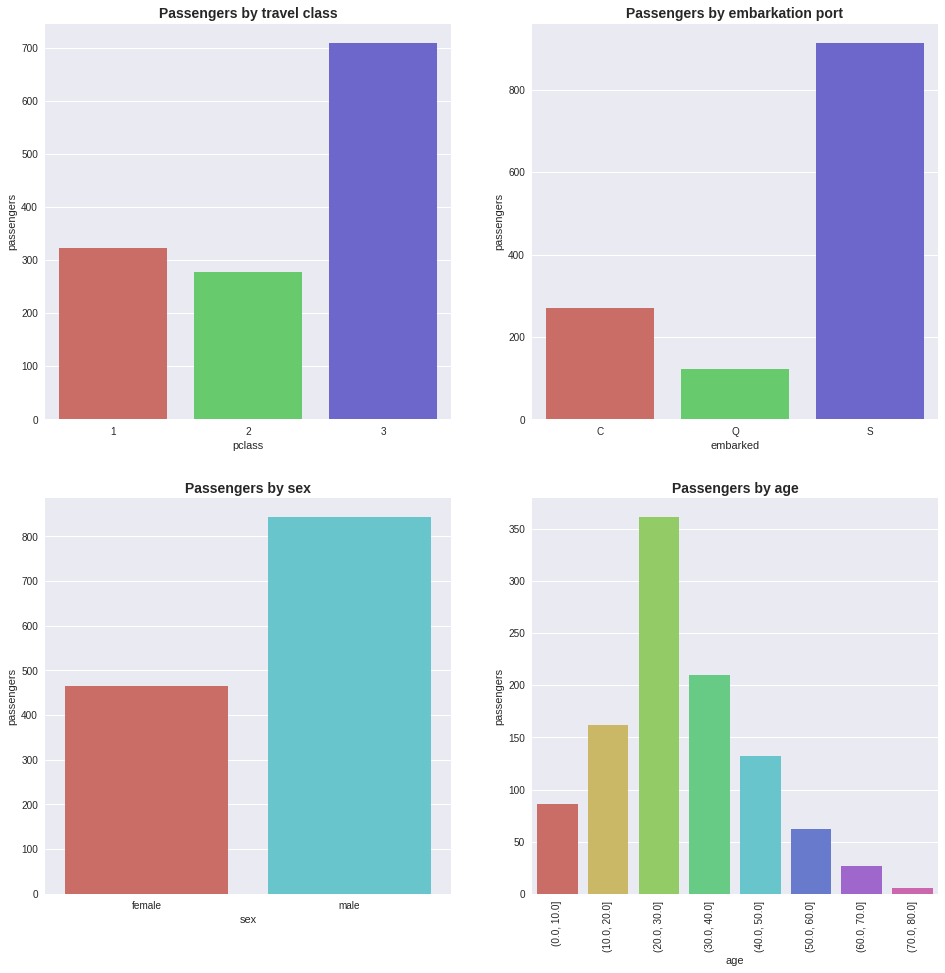

In [40]:
figure, axes = plt.subplots(2, 2, figsize=(16,16))

# Histogram travel class
data = titanic_data.pclass.value_counts(dropna=False)
plot_data_bar(data, axes[0, 0], 'Passengers by travel class', 'passengers')

# Embarkation port
data = titanic_data.embarked.value_counts(dropna=False)
plot_data_bar(data, axes[0, 1], 'Passengers by embarkation port', 'passengers')

# Sex
data = titanic_data.sex.value_counts(dropna=False)
plot_data_bar(data, axes[1, 0], 'Passengers by sex', 'passengers')

# Age
age_groups = pd.cut(titanic_data.age, np.arange(0, titanic_data.age.max() + 10, 10)).value_counts()
plot_data_bar(age_groups, axes[1, 1], 'Passengers by age', 'passengers')


# two men are missing => isnull doesn't find this! => empty strings
num_s = len(titanic_data.query('embarked == \'S\''))
num_q = len(titanic_data.query('embarked == \'Q\''))
num_c = len(titanic_data.query('embarked == \'C\''))
print ("Passengers with embarkation port:", num_s+num_q+num_c)

#Some passengers does not have age
null_age = titanic_data['age'].isnull().sum()
print("Passengers with no age:", null_age)

<h4> 3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.</h4>
<br>
<div>
<p>

There are some passingers that are listed in cabin names "F E..", "F G..". These are most probably input errors. We will just take these people as they are on both of the floors, since we don't know for sure. There is 7 people more than it really was on the ship, so we know there are 7 people more that we counted on two floors. We are of course aware of the fact that these people are counted on both floors because there is same posibility they were in one or another cabin. Of course, we could try to search if there is another person who is in one of two possible cabins, and then check if this cabin was for one or two people. But since we don't have information of how many people there were in specific cabin, we will just count these people as they were in both cabins.  
</p>
</div>

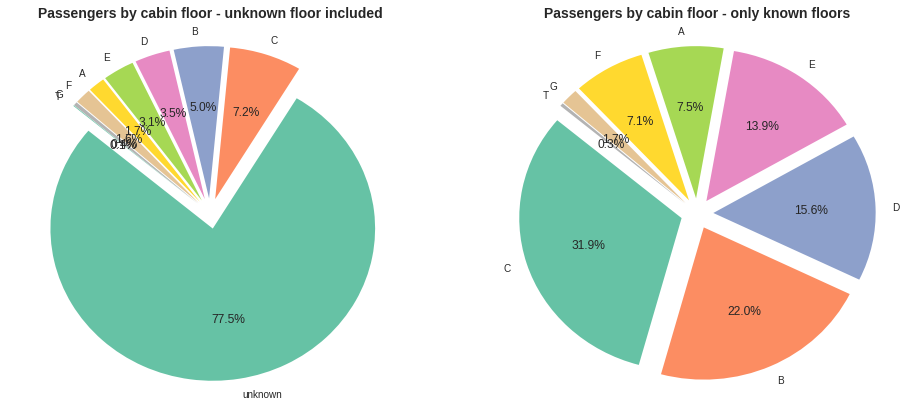

In [9]:
figure, axes = plt.subplots(1, 2, figsize=(16,7))

#We use our floor column that is categorical now
data = titanic_data.floor.value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
labels = data.index
plot_data_pie(data.values, axes[0], labels, explode, 'Passengers by cabin floor - unknown floor included')

data = data[1:] #without unknown
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
labels = data.index
plot_data_pie(data.values, axes[1], labels, explode, 'Passengers by cabin floor - only known floors')

<h4> 4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.</h4>
<br>
<div>
<p>
We plot a pie chart for each travel class.
We can see that in first class, there is a much higher chance of survival (~ 62%), whereas in the third, only 25,5% of passengers survived.
</p>
</div>

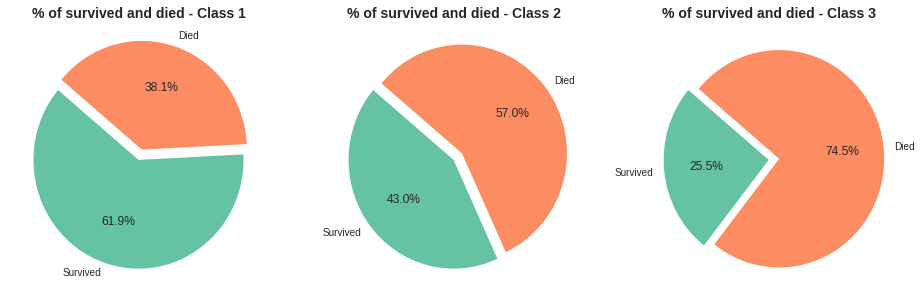

In [10]:
def plot_percentage_survivors(pclass, survivors_flag, axes):
    class_all_passengers = len(titanic_data.query("pclass == @pclass"))
    class_survivors = len(titanic_data.query("pclass == @pclass & survived==@survivors_flag"))
    colors = ['blue', 'red']
    explode = (0, 0.1)
    labels = ["Survived", "Died"]

    title='% of survived and died - Class {}'.format(pclass)
    plot_data_pie([class_survivors, class_all_passengers-class_survivors], axes, labels, explode, title=title)


figure, axes = plt.subplots(1, 3, figsize=(16,5))

plot_percentage_survivors(1, 1, axes[0])
plot_percentage_survivors(2, 1, axes[1])
plot_percentage_survivors(3, 1, axes[2])

<h4> 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.</h4>
<p>
We plot an histogram that shows the survival proportion by travel class and by sex. The number are relevant : women survived more than men, in every class.
</p>

In [11]:
# Function to get the proportion of passengers who survived by travel class and sex
def survived_class_sex(pclass, sex, survived_flag):
    survivors = len(titanic_data.query("pclass == @pclass & survived==@survived_flag & sex==@sex"))
    all_passengers_by_sex = len(titanic_data.query("pclass == @pclass & sex==@sex"))
    return survivors/all_passengers_by_sex

male= []
female= []

for i in range(1,4):
    male.append(survived_class_sex(i, 'male', 1))
    female.append(survived_class_sex(i, 'female', 1))

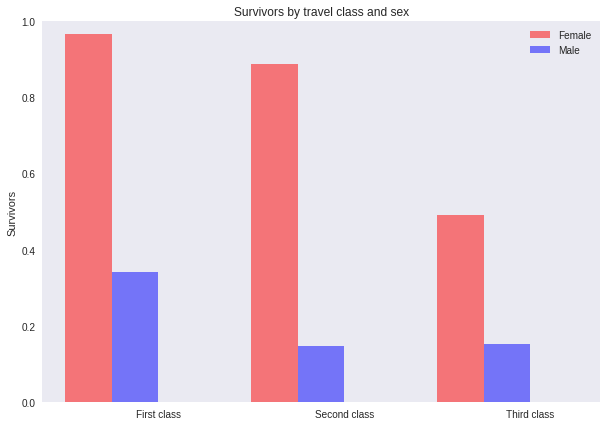

In [12]:
raw_data = {'pclass': ['First class', 'Second class', 'Third class'],
        'female': female,
        'male': male }
df = pd.DataFrame(raw_data, columns = ['pclass', 'female', 'male'])

pos = list(range(len(df['pclass']))) 
width = 0.25 

fig, ax = plt.subplots(figsize=(10,7))

plt.bar(pos, 
        df.female, 
        width, 
        alpha=0.5, 
        color='red', 
        label=df['pclass'][0]) 

plt.bar([p + width for p in pos], 
        df.male,
        width, 
        alpha=0.5, 
        color='blue', 
        label=df['pclass'][1]) 

ax.set_ylabel('Survivors')
ax.set_title('Survivors by travel class and sex')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['pclass'])

plt.xlim(min(pos)-width, max(pos)+width*3)
plt.ylim(0, 1)

plt.legend(['Female', 'Male'], loc='upper right')
plt.grid()
plt.show()


<br>
<h4> 6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.</h4>
<br>
<p>
First of all, we can see that many passengers does not have age, so we remove them from the dataset. Then, we sort passengers by age.<br>
We compute the median value to split the population, in order to have two equally populated age categories (even if some passengers have the median age).
<br>
The final DataFrame shows that women and younger passengers had a higher chance to survive. Therefore, the higher class a passenger was, the higher chance to survive he/she had.
</p>

In [13]:
people_unknown_age = titanic_data.age.isnull().sum()
people_known_age = len(titanic_data) - people_unknown_age
print ("People with unknown age: ",people_unknown_age)
print ("People with known age: ", people_known_age)


age_categories_df = titanic_data.copy()
age_categories_df = age_categories_df.loc[~age_categories_df.age.isnull()].copy()

# sorted by age, rows with age=NaN removed
age_categories_df = age_categories_df.sort_values(by='age').copy()
age_categories_df = age_categories_df.reset_index(drop=True)

print ("Shape of sorted by age without NaN, reindexed: ", age_categories_df.shape)

# split into two groups, now when it is sorted

median_age=age_categories_df.age.median()
max_age=age_categories_df.age.max()

people_first_group_count = age_categories_df.query("age < @median_age")
print ("First group count ", len(people_first_group_count))

people_second_group_count = age_categories_df.query("age > @median_age")
print ("Second group count ", len(people_second_group_count))


people_with_median_age = age_categories_df.query("age == @median_age")

print ("Number of people ", median_age, " years old is ", len(people_with_median_age))


splitter = len(age_categories_df)//2
print ("Splitter: ", splitter) 
category_col = pd.Series()
cate_1 = '(0.0-{}]'.format(median_age)
cate_2 = '({}-{}]'.format(median_age, max_age)
category_col  = [cate_1]*splitter + [cate_2]*splitter
age_categories_df['age'] = category_col

#Show that we have two equal groups
print(age_categories_df.age.value_counts())


age_categories_df.survived = age_categories_df.survived.astype('int') #To compute the mean just after
data = age_categories_df.groupby(['age', 'pclass', 'sex'])['survived'].mean() * 100    #Get the percentage value
data = pd.DataFrame(data)
data.columns = ['% survived'] #Update column name for a better reading

data

People with unknown age:  263
People with known age:  1046
Shape of sorted by age without NaN, reindexed:  (1046, 15)
First group count  504
Second group count  510
Number of people  28.0  years old is  32
Splitter:  523
(28.0-80.0]    523
(0.0-28.0]     523
Name: age, dtype: int64


% survived
age         pclass sex               
(0.0-28.0]  1      female   95.121951
                   male     50.000000
            2      female   90.566038
                   male     22.535211
            3      female   51.851852
                   male     18.636364
(28.0-80.0] 1      female   96.739130
                   male     31.404959
            2      female   88.000000
                   male      8.045977
            3      female   36.363636
                   male     13.953488